In [1]:
import os
import numpy as np
from PIL import Image
import random
from matplotlib import pyplot as plt
from PinRelabeler import read_boxes, get_boxes, overlay_good_pins, PinRelabeler, save2file, combineAllBoxes
from DataAugmentator import DataAugmentator

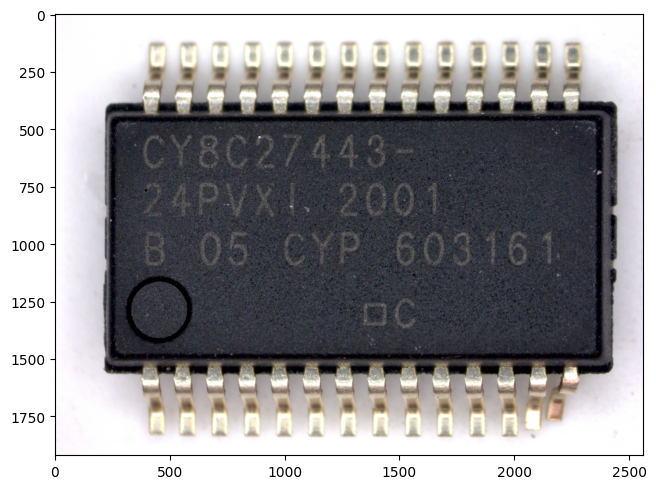

In [2]:
pr = PinRelabeler('./783-Pin-Detection/datasets/ic-dataset/images/train',
                     './783-Pin-Detection/datasets/ic-dataset/labels/train')

image = Image.open('./783-Pin-Detection/datasets/ic-dataset/images/val/00.png')
boxes = read_boxes('./783-Pin-Detection/datasets/ic-dataset/labels/val/00.txt')

left_good, left_bad, right_good, right_bad, up_good, up_bad, down_good, down_bad = \
    pr.relabel_pins(image, boxes)

plt.figure(figsize=[10,5])
plt.imshow(overlay_good_pins(
    image,
    left_bad
))
plt.tight_layout()
plt.show()

In [7]:
input_image_folder  = './783-Pin-Detection/datasets/ic-dataset/images/val'
output_image_folder = './783-Pin-Detection/datasets/aug-ic-dir-dataset/images/val'
input_label_folder  = './783-Pin-Detection/datasets/ic-dataset/labels/val'
output_label_folder = './783-Pin-Detection/datasets/aug-ic-dir-dataset/labels/val'

image_files = [f for f in os.listdir(input_image_folder) if f.endswith(('.png', '.jpg'))]
for image_file in image_files:
    image_path = os.path.join(input_image_folder, image_file)
    image = Image.open(image_path).convert('RGB')

    label_file = os.path.splitext(image_file)[0] + '.txt'
    label_path = os.path.join(input_label_folder, label_file)
    boxes = read_boxes(label_path)

    left_good, left_bad, right_good, right_bad, up_good, up_bad, down_good, down_bad = \
    pr.relabel_pins(image, boxes)

    boxes = combineAllBoxes([
        left_good, left_bad,
        right_good, right_bad,
        up_good, up_bad,
        down_good, down_bad
    ])

    new_label_path = os.path.join(output_label_folder, label_file)
    save2file(boxes, new_label_path)

    output_image_path = os.path.join(output_image_folder, image_file)
    image.save(output_image_path)

Data saved to ./783-Pin-Detection/datasets/aug-ic-dir-dataset/labels/val\00.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dir-dataset/labels/val\03.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dir-dataset/labels/val\09.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dir-dataset/labels/val\25.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dir-dataset/labels/val\26.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dir-dataset/labels/val\27.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dir-dataset/labels/val\28.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dir-dataset/labels/val\29.txt


In [4]:
input_image_folder  = './783-Pin-Detection/datasets/ic-dataset/images/train'
output_image_folder = './783-Pin-Detection/datasets/ic-dir-dataset/images/train'
input_label_folder  = './783-Pin-Detection/datasets/ic-dataset/labels/train'
output_label_folder = './783-Pin-Detection/datasets/ic-dir-dataset/labels/train'

image_files = [f for f in os.listdir(input_image_folder) if f.endswith(('.png', '.jpg'))]
for image_file in image_files:
    image_path = os.path.join(input_image_folder, image_file)
    image = Image.open(image_path).convert('RGB')

    label_file = os.path.splitext(image_file)[0] + '.txt'
    label_path = os.path.join(input_label_folder, label_file)
    boxes = read_boxes(label_path)

    left_good, left_bad, right_good, right_bad, up_good, up_bad, down_good, down_bad = \
    pr.relabel_pins(image, boxes)

    boxes = combineAllBoxes([
        left_good, left_bad,
        right_good, right_bad,
        up_good, up_bad,
        down_good, down_bad
    ])

    new_label_path = os.path.join(output_label_folder, label_file)
    save2file(boxes, new_label_path)

    output_image_path = os.path.join(output_image_folder, image_file)
    image.save(output_image_path)

Data saved to ./783-Pin-Detection/datasets/ic-dir-dataset/labels/train\02.txt
Data saved to ./783-Pin-Detection/datasets/ic-dir-dataset/labels/train\04.txt
Data saved to ./783-Pin-Detection/datasets/ic-dir-dataset/labels/train\08.txt
Data saved to ./783-Pin-Detection/datasets/ic-dir-dataset/labels/train\10.txt
Data saved to ./783-Pin-Detection/datasets/ic-dir-dataset/labels/train\11.txt
Data saved to ./783-Pin-Detection/datasets/ic-dir-dataset/labels/train\12.txt
Data saved to ./783-Pin-Detection/datasets/ic-dir-dataset/labels/train\13.txt
Data saved to ./783-Pin-Detection/datasets/ic-dir-dataset/labels/train\14.txt
Data saved to ./783-Pin-Detection/datasets/ic-dir-dataset/labels/train\15.txt
Data saved to ./783-Pin-Detection/datasets/ic-dir-dataset/labels/train\16.txt
Data saved to ./783-Pin-Detection/datasets/ic-dir-dataset/labels/train\17.txt
Data saved to ./783-Pin-Detection/datasets/ic-dir-dataset/labels/train\18.txt
Data saved to ./783-Pin-Detection/datasets/ic-dir-dataset/labels

In [6]:
input_image_folder  = './783-Pin-Detection/datasets/ic-dataset/images/train'
output_image_folder = './783-Pin-Detection/datasets/aug-ic-dir-dataset/images/train'
input_label_folder  = './783-Pin-Detection/datasets/ic-dataset/labels/train'
output_label_folder = './783-Pin-Detection/datasets/aug-ic-dir-dataset/labels/train'
package_label_folder = './783-Pin-Detection/datasets/ic-dataset/labels/train'

da = DataAugmentator('./783-Pin-Detection/datasets/ic-dataset/images/train',
                     './783-Pin-Detection/datasets/ic-dataset/labels/train')

image_files = [f for f in os.listdir(input_image_folder) if f.endswith(('.png', '.jpg'))]
for image_file in image_files:
    image_path = os.path.join(input_image_folder, image_file)
    image = Image.open(image_path).convert('RGB')
    image_width, image_height = image.size

    label_file = os.path.splitext(image_file)[0] + '.txt'
    label_path = os.path.join(input_label_folder, label_file)

    boxes = read_boxes(label_path)
    package_file = os.path.splitext(image_file)[0] + '.txt'
    package_file = os.path.join(package_label_folder, package_file)
    package_boxes = read_boxes(package_file)

    left_good, left_bad, right_good, right_bad, up_good, up_bad, down_good, down_bad = \
    pr.relabel_pins(image, boxes)

    left_pins  = combineAllBoxes([left_good, left_bad])
    right_pins = combineAllBoxes([right_good, right_bad])
    up_pins    = combineAllBoxes([up_good, up_bad])
    down_pins  = combineAllBoxes([down_good, down_bad])

    new_image, updated_left_good, updated_left_bad = da.add_bent_pins(image, left_pins, n = 100, extend=1.5, angle=10, cls_in=2, cls_out=6, package_boxes=package_boxes)
    new_image, updated_right_good, updated_right_bad = da.add_bent_pins(new_image, right_pins, n = 100, extend=1.5, angle=10, cls_in=3, cls_out=7,  package_boxes=package_boxes)
    new_image, updated_up_good, updated_up_bad = da.add_bent_pins(new_image, up_pins, n = 100, extend=1.5, angle=10, cls_in=0, cls_out=4,  package_boxes=package_boxes)
    new_image, updated_down_good, updated_down_bad = da.add_bent_pins(new_image, down_pins, n = 100, extend=1.5, angle=10, cls_in=1,cls_out=5,  package_boxes=package_boxes)

    new_boxes = combineAllBoxes(
        [updated_left_good, updated_left_bad, updated_right_good, updated_right_bad, updated_up_good, updated_up_bad, updated_down_good, updated_down_bad]
    )

    new_label_path = os.path.join(output_label_folder, "aug" + label_file)
    save2file(new_boxes, new_label_path)

    output_image_path = os.path.join(output_image_folder, "aug" + image_file)
    new_image.save(output_image_path)

    # save original images too
    new_label_path = os.path.join(output_label_folder, label_file)
    save2file(boxes, new_label_path)

    output_image_path = os.path.join(output_image_folder, image_file)
    image.save(output_image_path)

Data saved to ./783-Pin-Detection/datasets/aug-ic-dir-dataset/labels/train\aug02.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dir-dataset/labels/train\02.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dir-dataset/labels/train\aug04.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dir-dataset/labels/train\04.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dir-dataset/labels/train\aug08.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dir-dataset/labels/train\08.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dir-dataset/labels/train\aug10.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dir-dataset/labels/train\10.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dir-dataset/labels/train\aug11.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dir-dataset/labels/train\11.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dir-dataset/labels/train\aug12.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dir-dataset/labels/train\12.tx